### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Loading Data

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [4]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 251079 rows and 15 columns


### Data  Understanding

#### Converting to correct type

*Column Year*
There are some string values in this column, and we are going to keep only those values that contain years.

In [5]:
for i in df.year.unique().tolist():
  if not  i.isnumeric():
      print(i)

Petrol
Automatic
Manual
Diesel
04/2017
Electric
12/2003
05/2017
04/2006
LPG
8.000 km
113.000 km
32.250 km
02/2020
06/2021
07/2021
Hybrid
03/2023
01/2019
10/2010
280.000 km
03/2015
10/2016
06/2016
80.000 km
06/2018
09/2018
39.900 km
18.990 km
05/2023
04/2013
05/2015
05/2016
07/2018
12/2022
12/2020
05/2021
108.500 km
11/2018
33.150 km
12.520 km
15.180 km
6.500 km
64.500 km
03/2019
1.000 km
01/2023
02/2023
06/2023
11/2013
49.000 km
04/2023
03/2007
159.400 km
217.946 km
75.700 km
243.431 km
CNG


In [6]:
df = df[df['year'].str.isnumeric()]
df.year = df.year.astype(int)

*Column Price in Euro*
Same thing can be observed for the price column as well. So those rows, will be omitted.

In [7]:
for i in df.price_in_euro.unique().tolist():
  if not  i.isnumeric():
      print(i)

ROSTHREI
SHA
PGD
 NAVI


In [8]:
df = df[df['price_in_euro'].str.isnumeric()]
df.price_in_euro = df.price_in_euro.astype(int)

*Column Power KW and Power PS*

In [9]:
df.power_kw = df.power_kw.astype(float)
df.power_ps = df.power_ps.astype(float)

*Fuel consumption in litres/100km*

In [10]:
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].map(lambda x: str(x).split(' ')[0])

In [11]:
condition = (df['fuel_consumption_l_100km']=='-')
df.loc[condition, 'fuel_consumption_l_100km'] = np.nan

In [12]:
df.fuel_consumption_l_100km = df.fuel_consumption_l_100km.str.replace(",",".").astype(float)

In [13]:
df.loc[df['fuel_type'] == 'Electric', 'fuel_consumption_l_100km'] = 0


*Fuel consumption in g/ km*

In [14]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].map(lambda x: str(x).split(' ')[0])

In [15]:
condition = (df['fuel_consumption_g_km']=='-')
df.loc[condition, 'fuel_consumption_g_km'] = np.nan
condition2 = (df['fuel_consumption_g_km']=='-/-')
df.loc[condition2, 'fuel_consumption_g_km'] = np.nan


In [16]:
df.loc[df['fuel_type'] == 'Electric', 'fuel_consumption_g_km'] = 0


In [17]:
df.fuel_consumption_g_km = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')

In [18]:
df.rename(columns={'Unnamed: 0': "ID"},inplace = True)

In [19]:
#checking the percent of missing value
missing_data_percentage=(df.isna().sum()/len(df))*100
missing_data_percentage

ID                           0.000000
brand                        0.000000
model                        0.000000
color                        0.066167
registration_date            0.000000
year                         0.000000
price_in_euro                0.000000
power_kw                     0.051020
power_ps                     0.051020
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km     8.954879
fuel_consumption_g_km       15.067363
mileage_in_km                0.024713
offer_description            0.000000
dtype: float64

### Visualizations

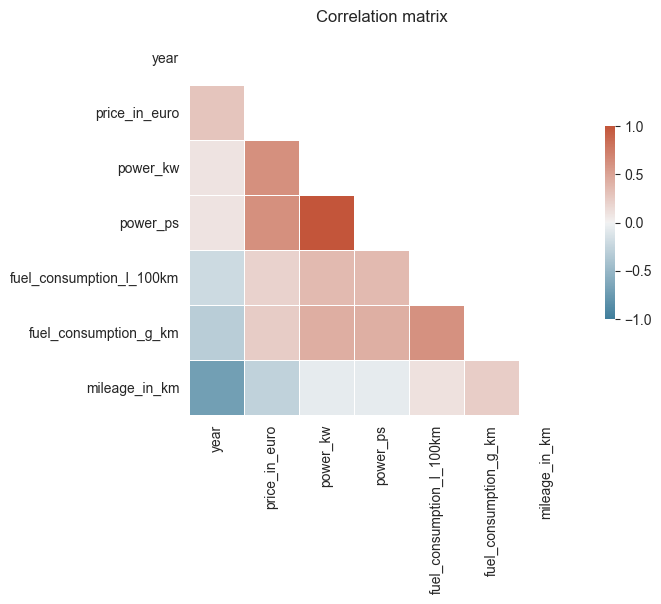

In [20]:
corr = df.loc[:, ~df.columns.isin(['ID','brand', 'model', 'color', 'transmission_type','fuel_type','offer_description'])].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation matrix")
plt.show()

In [21]:
def creating_box_hist(column, df):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_dis) = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.20, .80)},figsize=(8, 5))
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode().tolist()[0]

    f.suptitle("Data distribution of  "+ column  , fontsize=10, fontweight='bold')
    # assigning a graph to each ax

    sns.boxplot(df[column], ax=ax_box,orient = 'h',showmeans = True)

    sns.despine(top=True,right=True,left=True)
    sns.histplot(df[column],kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})


In [22]:
numeric_columns = df.loc[:, ~df.columns.isin(['ID','brand', 'model', 'color', 'transmission_type','fuel_type','offer_description','registration_date'])].columns


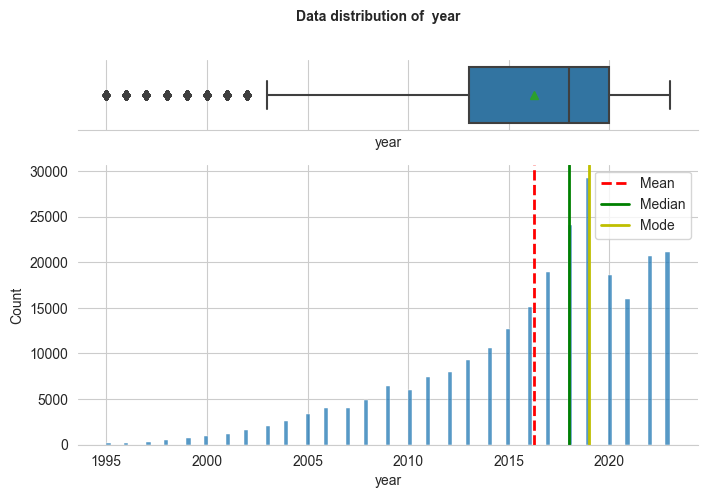

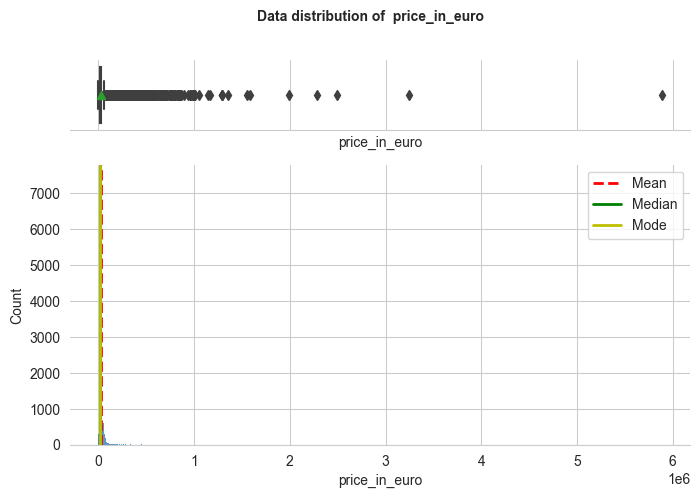

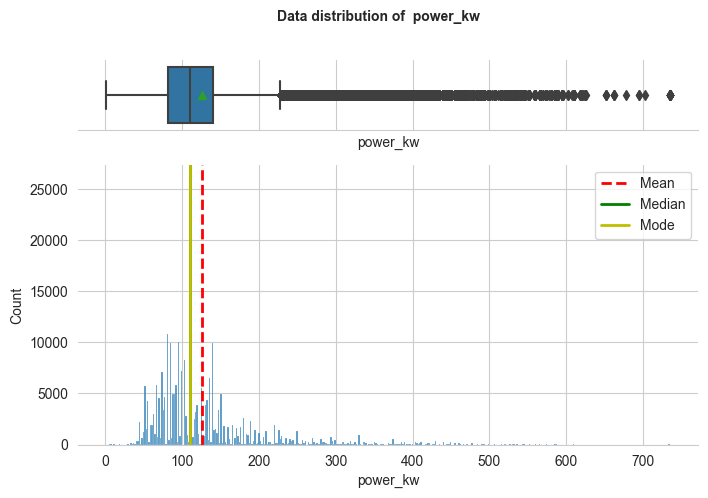

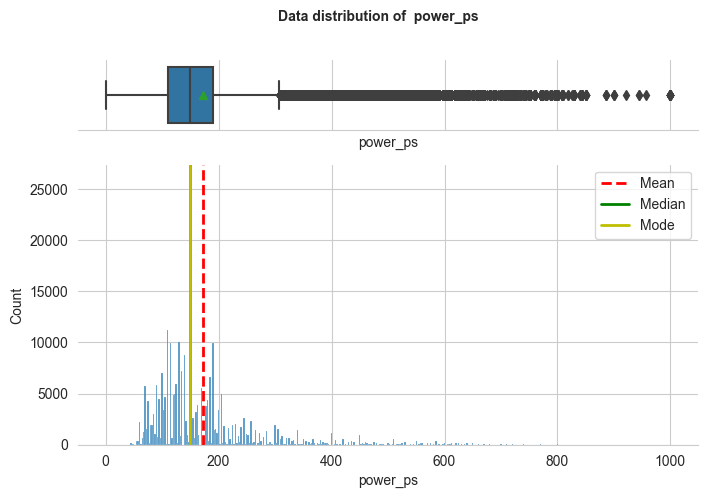

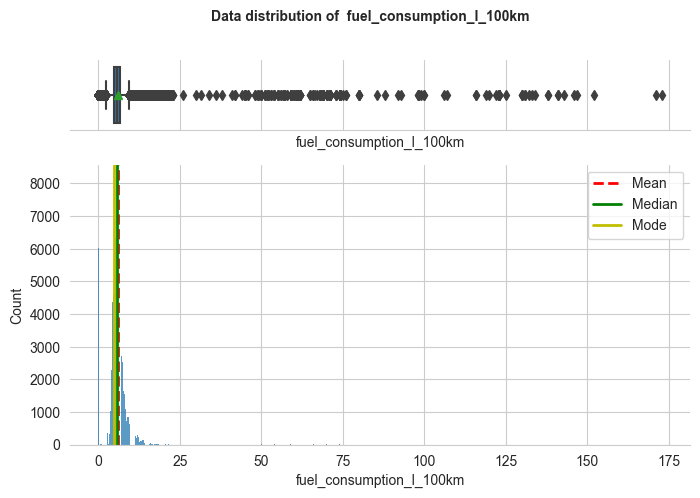

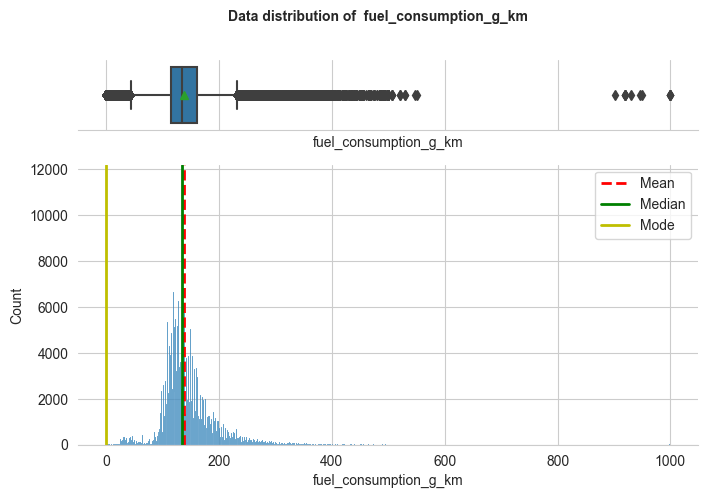

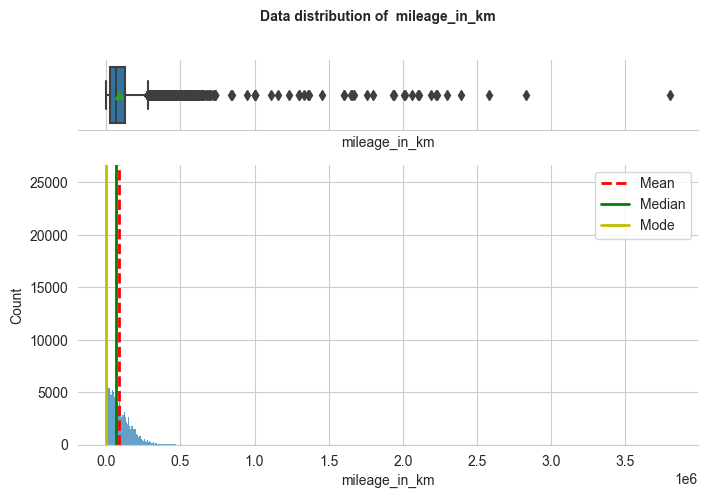

In [23]:
# Plots of numeric columns
for i in numeric_columns:
    creating_box_hist(i,df)


### Deal w/ some Outliers (data that does not make sense)

In [24]:
median_per_brand_co2 = df.groupby('brand')['fuel_consumption_g_km'].median().reset_index()

In [25]:
df['fuel_consumption_g_km'] = df.apply(lambda row: median_per_brand_co2.loc[median_per_brand_co2['brand'] == row['brand'], 'fuel_consumption_g_km'].values[0]
                                           if row['fuel_consumption_l_100km'] > 15 else row['fuel_consumption_g_km'], axis=1)

In [26]:
median_per_brand_fuel = df.groupby('brand')['fuel_consumption_l_100km'].median().reset_index()

In [27]:
df['fuel_consumption_l_100km'] = df.apply(lambda row: median_per_brand_fuel.loc[median_per_brand_fuel['brand'] == row['brand'], 'fuel_consumption_l_100km'].values[0]
                                           if row['fuel_consumption_l_100km'] > 15 else row['fuel_consumption_l_100km'], axis=1)

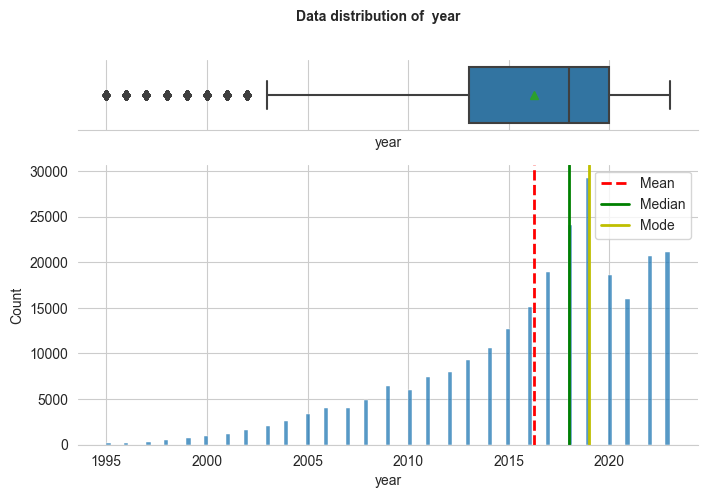

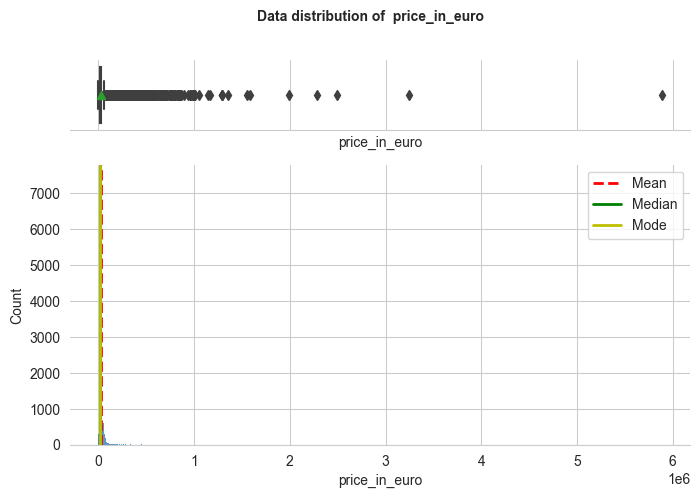

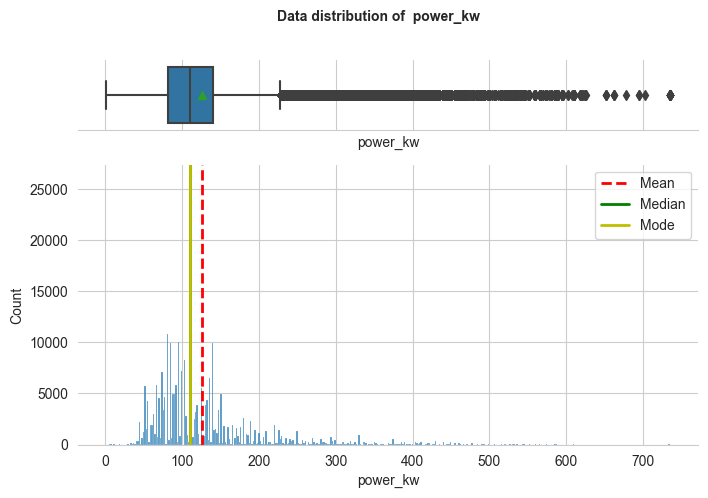

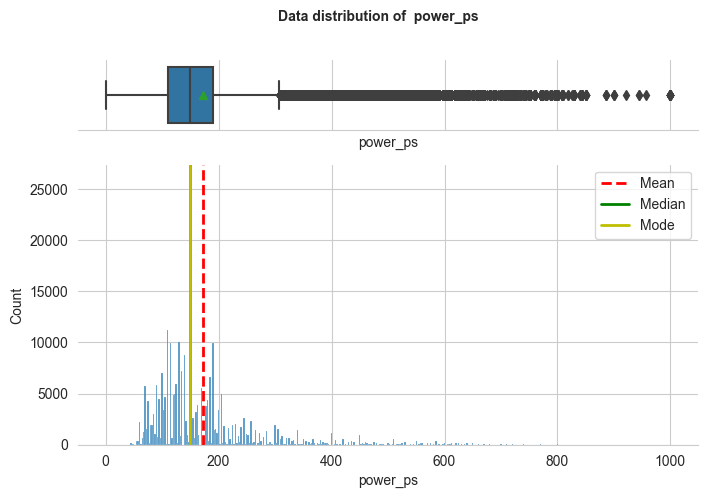

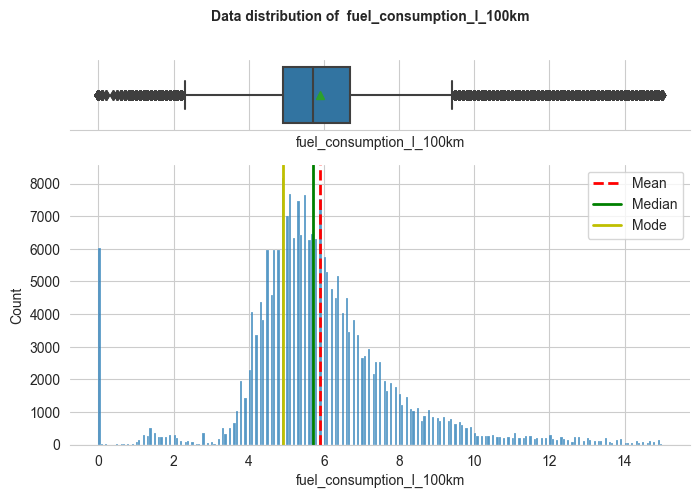

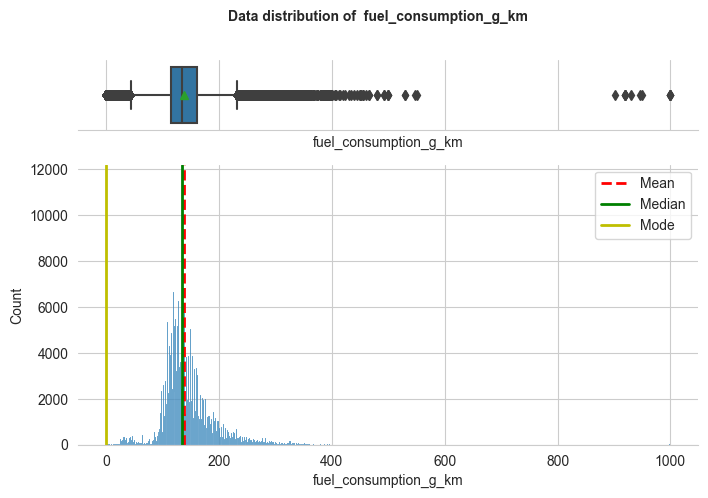

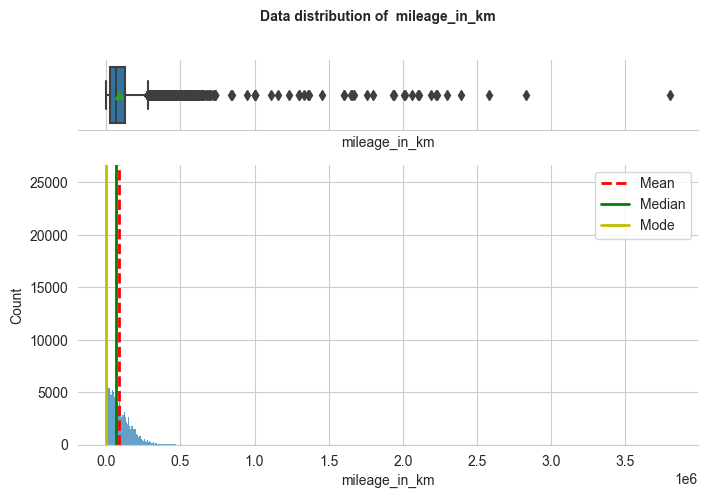

In [28]:
for i in numeric_columns:
    creating_box_hist(i,df)

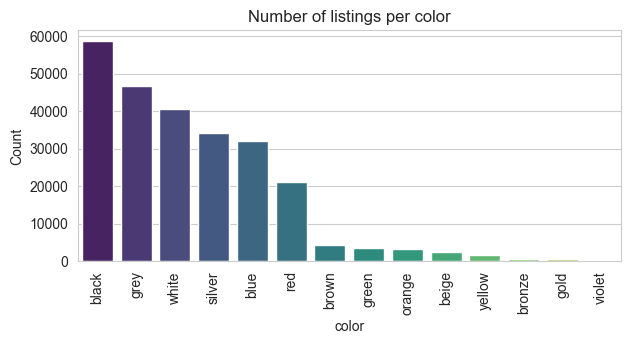

In [29]:
plt.figure(figsize=(7, 3))
df_color_count = df.groupby('color')['color'].count().reset_index(name='Count')
df_color_count = df_color_count.sort_values(by='Count', ascending=False)
sns.barplot(x=df_color_count['color'], y=df_color_count['Count'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of listings per color')
plt.show()


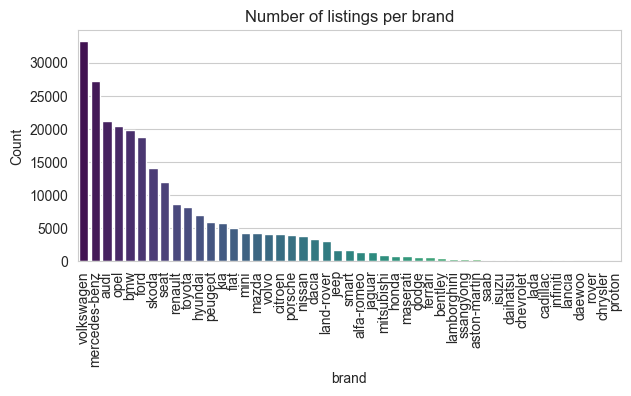

In [30]:
plt.figure(figsize=(7, 3))

df_brand_count = df.groupby('brand')['brand'].count().reset_index(name='Count')
df_brand_count = df_brand_count.sort_values(by='Count', ascending=False)
sns.barplot(x=df_brand_count['brand'], y=df_brand_count['Count'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of listings per brand')
plt.show()


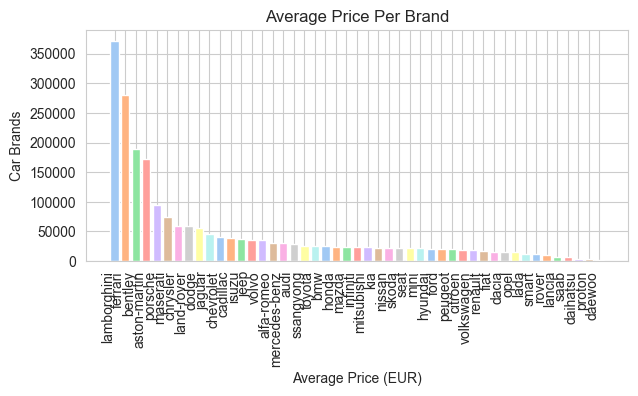

In [31]:
plt.figure(figsize=(7, 3))

brandPrice = df[['brand', 'price_in_euro']].groupby('brand').mean().sort_values(by = 'price_in_euro',ascending = False)
colors = sns.color_palette('pastel')[0:50]
plt.bar([brand for brand in brandPrice.index], [brandPrice.loc[i][0] for i in brandPrice.index], color=colors)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Average Price (EUR)')
plt.ylabel('Car Brands')  # Add y-axis label for brand names
plt.title('Average Price Per Brand')
plt.show()

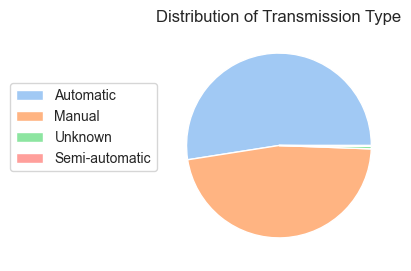

In [32]:
transmission = df['transmission_type'].value_counts()
colors  = sns.color_palette('pastel')[0:10]
plt.figure(figsize=(3, 3))
plt.pie(transmission, colors=colors)
plt.legend(transmission.index, loc='upper right', bbox_to_anchor=(0, 0.8),labels = transmission.index)
plt.title('Distribution of Transmission Type')
plt.show()

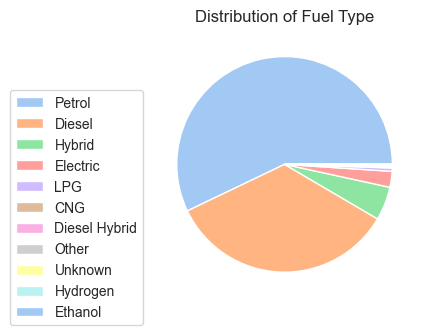

In [33]:
fuel = df['fuel_type'].value_counts()
colors  = sns.color_palette('pastel')[0:10]
plt.figure(figsize=(3.5, 3.5))
plt.pie(fuel, colors=colors)
plt.legend(fuel.index, loc='upper right', bbox_to_anchor=(0, 0.8),labels = fuel.index)
plt.title('Distribution of Fuel Type')
plt.show()

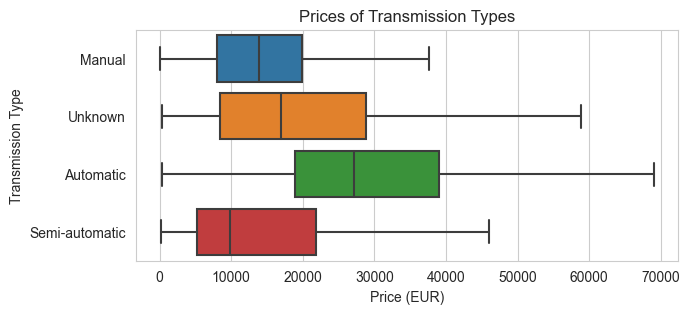

In [34]:
plt.figure(figsize=(7, 3))

sns.boxplot( data = df, x = 'price_in_euro', y = 'transmission_type', showfliers = False)
plt.ylabel("Transmission Type")
plt.xlabel("Price (EUR)")
plt.title("Prices of Transmission Types")

plt.show()

In [35]:
transmission_d = transmission.reset_index()
transmission_d['%'] = transmission_d['count']/len(df)
transmission_d

,transmission_type,count,%
0,Automatic,131640,0.524713
1,Manual,117780,0.469467
2,Unknown,1143,0.004556
3,Semi-automatic,317,0.001264


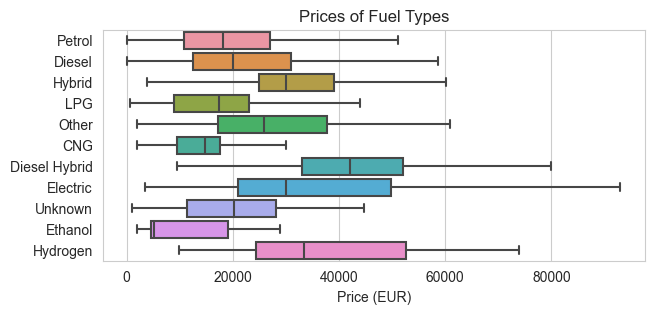

In [36]:
plt.figure(figsize=(7, 3))
sns.boxplot(data = df, x = 'price_in_euro', y = 'fuel_type', showfliers = False)
plt.ylabel("")
plt.xlabel("Price (EUR)")
plt.title("Prices of Fuel Types")
plt.show()

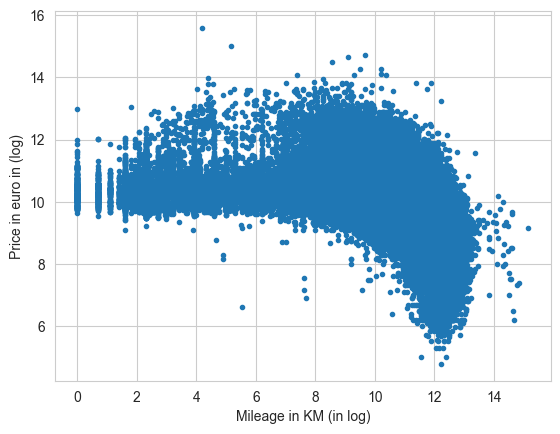

In [37]:
plt.plot(df['mileage_in_km'].apply(lambda x: np.log(x)),df['price_in_euro'].apply(lambda x: np.log(x)),'',data=df, linestyle='', marker='o', markersize=3)
plt.xlabel('Mileage in KM (in log)')
plt.ylabel('Price in euro in (log)')
plt.show()

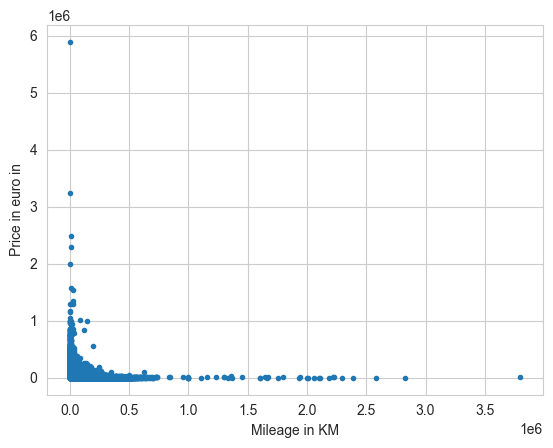

In [38]:
plt.plot('mileage_in_km','price_in_euro','',data=df, linestyle='', marker='o', markersize=3)
plt.xlabel('Mileage in KM')
plt.ylabel('Price in euro in')
plt.show()

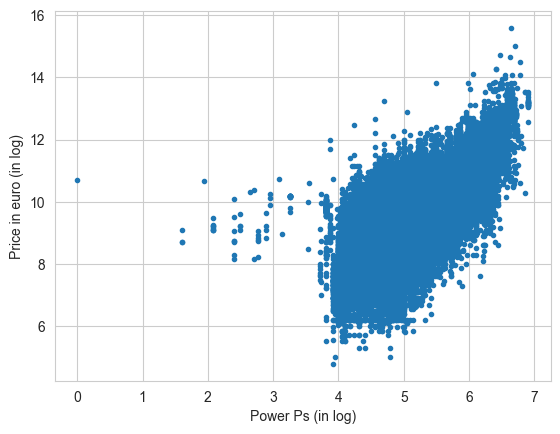

In [39]:
plt.plot(df['power_ps'].apply(lambda x: np.log(x)),df['price_in_euro'].apply(lambda x: np.log(x)),'',data=df, linestyle='', marker='o', markersize=3)
plt.xlabel('Power Ps (in log)')
plt.ylabel('Price in euro (in log)')
plt.show()

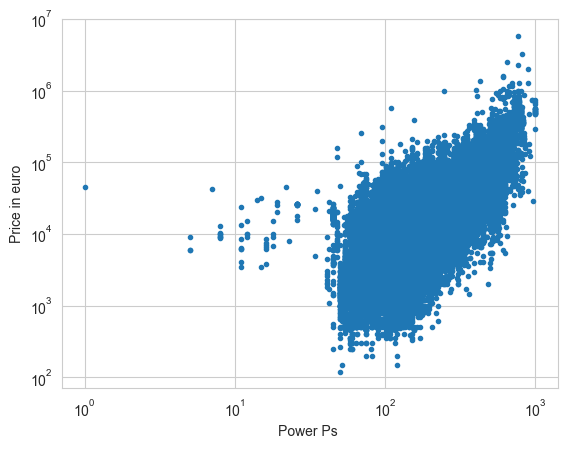

In [40]:
plt.plot('power_ps','price_in_euro','',data=df, linestyle='', marker='o', markersize=3)
plt.xlabel('Power Ps ')
plt.ylabel('Price in euro')
plt.yscale('log')
plt.xscale('log')
plt.show()

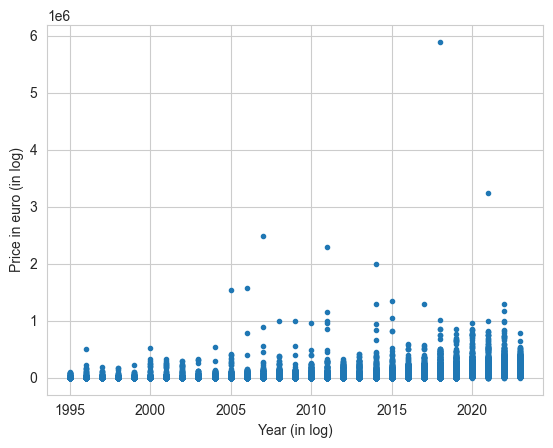

In [41]:
plt.plot('year','price_in_euro','',data=df, linestyle='', marker='o', markersize=3)
plt.xlabel('Year (in log)')
plt.ylabel('Price in euro (in log)')
plt.show()

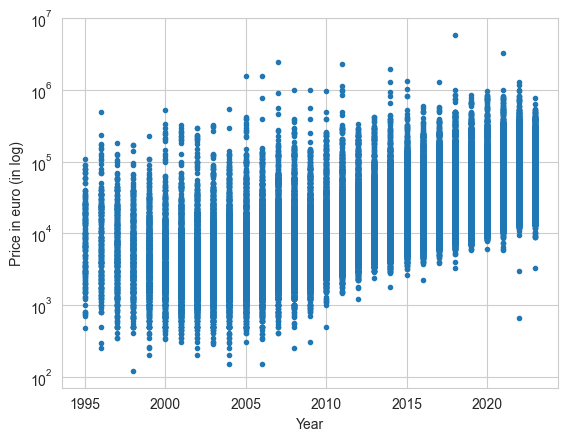

In [42]:
plt.plot('year','price_in_euro','',data=df, linestyle='', marker='o', markersize=3)
plt.xlabel('Year')
plt.yscale("log")
plt.ylabel('Price in euro (in log)')
plt.show()

## Data Preparation And Preprocessing 
### Missing data

In [43]:
for i in df.columns:
    if  df[i].isna().sum()!=0:
        print('{} column has {} missing values. Data type is {}'.format(i, df[i].isna().sum(), df[i].isna().sum()/len(df)*100))

color column has 166 missing values. Data type is 0.06616709183673469
power_kw column has 128 missing values. Data type is 0.05102040816326531
power_ps column has 128 missing values. Data type is 0.05102040816326531
fuel_consumption_l_100km column has 22466 missing values. Data type is 8.954878826530614
fuel_consumption_g_km column has 37726 missing values. Data type is 15.037468112244898
mileage_in_km column has 62 missing values. Data type is 0.02471301020408163


In [44]:
# df['fuel_consumption_l_100km'] = df.apply(
#         lambda row: float(0) if pd.isnull(row['fuel_consumption_l_100km']) & \
#         ((row['fuel_type'] == 'Electric')  or \
#          (row['fuel_type'] == 'Hydrogen')  or \
#          (row['fuel_type'] == 'Ethanol')) else row['fuel_consumption_l_100km'],
#     axis = 1)

In [45]:
#filling na value with mode
df['color'].fillna(df['color'].mode()[0], inplace=True)
df.color.unique()

array(['red', 'black', 'silver', 'grey', 'white', 'beige', 'blue',
       'green', 'yellow', 'gold', 'brown', 'bronze', 'violet', 'orange'],
      dtype=object)

In [46]:
#group by brand and use the mean to fill na
df['power_kw'].fillna(df.groupby('brand')['power_kw'].transform('mean'), inplace=True)
df['power_ps'].fillna(df.groupby('brand')['power_ps'].transform('mean'), inplace=True)

In [47]:
#replace values with 0 on fuel consumption with na values
df.loc[(df['fuel_type'] != 'Electric') & (df['fuel_consumption_l_100km'] == 0), 'fuel_consumption_l_100km'] = float('nan')
df.loc[(df['fuel_type'] != 'Electric') & (df['fuel_consumption_g_km'] == 0), 'fuel_consumption_g_km'] = float('nan')


In [48]:
#group values by brand and use mean to fill na and also replace with 0 for fuel consumption if fuel type is electric
df.loc[df['fuel_type'] == 'Electric', 'fuel_consumption_g_km'] = 0
df.loc[df['fuel_type'] == 'Electric', 'fuel_consumption_l_100km'] = 0

df['fuel_consumption_l_100km'].fillna(df.groupby('brand')['fuel_consumption_l_100km'].transform('mean'), inplace=True)
df['fuel_consumption_g_km'].fillna(df.groupby('brand')['fuel_consumption_g_km'].transform('mean'), inplace=True)


In [49]:
df['mileage_in_km'].fillna(df.groupby('brand')['mileage_in_km'].transform('mean'), inplace=True)
df=df.dropna()

In [50]:
df.isna().sum()

ID                          0
brand                       0
model                       0
color                       0
registration_date           0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
offer_description           0
dtype: int64

In [51]:
df[df['brand']=='proton']

,ID,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description


In [52]:
#replace unknown with others
df['transmission_type']=df['transmission_type'].replace('Unknown','Others')

In [53]:
df['transmission_type'].unique()

array(['Manual', 'Others', 'Automatic', 'Semi-automatic'], dtype=object)

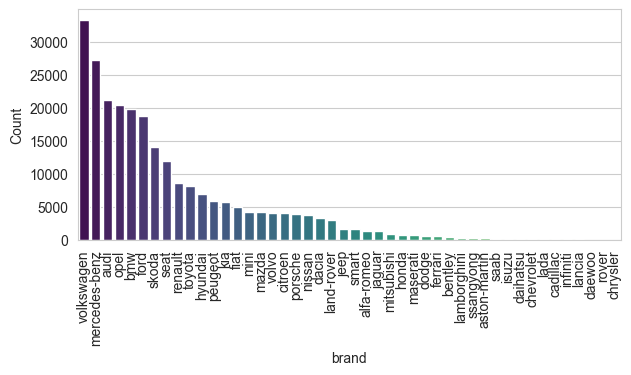

In [54]:
plt.figure(figsize=(7,3))
df_brand_count2=df.groupby('brand')['brand'].count().reset_index(name='Count')
df_brand_count2=df_brand_count2.sort_values(by='Count', ascending=False)
sns.barplot(x= df_brand_count2['brand'],y=df_brand_count2['Count'],palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [55]:
#checking for duplicates
dup=df[df.duplicated()]
dup

,ID,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description


There is no duplicates which is good

#### Attributes which are not useful

*Registration Date* - Dropping this column since it contains same values as the Year column

In [56]:
#drop useless columns
df.drop(columns = ['ID','registration_date','offer_description'],inplace = True)

#### Derived Attributes

In [57]:
#derived columns age of car and power-price ration
current_year=datetime.now().year
df['car_age']= current_year-df['year']
df['power price ratio']= df['power_kw']/df['price_in_euro']

In [58]:
column_order=['brand', 'model', 'color', 'year', 'car_age', 'price_in_euro','power_kw', 'power_ps','power price ratio' ,'transmission_type', 'fuel_type','fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km']
df=df[column_order]

In [59]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', 'Other', 'CNG',
       'Diesel Hybrid', 'Electric', 'Unknown', 'Ethanol', 'Hydrogen'],
      dtype=object)

#### Discovering relationships 

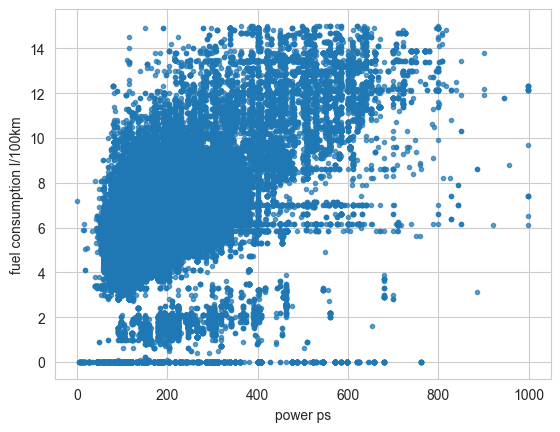

In [60]:
#scatter plot for price vs fuel consumption l/100km
#df_sample=df.sample(1000)

plt.plot('power_ps','fuel_consumption_l_100km','',data=df, linestyle='', marker='o', markersize=3, alpha=0.7)
#plt.plot('power_ps',2*x+1,color='red')
plt.xlabel('power ps')
plt.ylabel('fuel consumption l/100km')

plt.show()

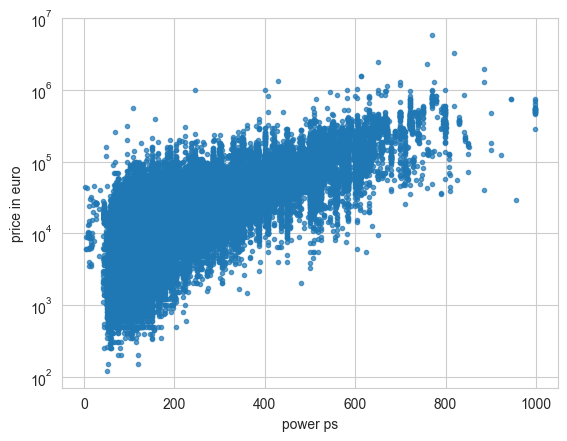

In [61]:
#scatter plot for power ps vs price in euro 
plt.plot('power_ps','price_in_euro','',data=df, linestyle='', marker='o', markersize=3, alpha=0.7)
#plt.plot('power_ps',2*x+1,color='red')
plt.xlabel('power ps')
plt.ylabel('price in euro')
plt.yscale('log')
plt.show()

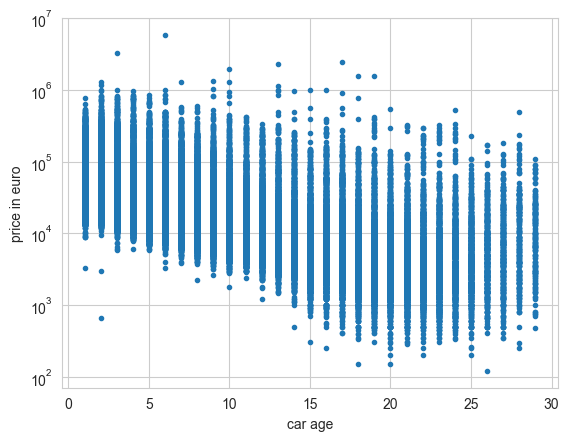

In [62]:
#scatter plot of age with price
plt.plot('car_age','price_in_euro','',data=df, linestyle='', marker='o', markersize=3)
#plt.plot('power_ps',2*x+1,color='red')
plt.xlabel('car age')
plt.ylabel('price in euro')
plt.yscale('log')

plt.show()

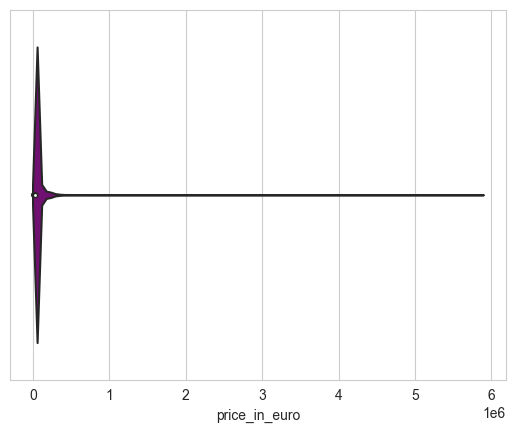

In [63]:
sns.violinplot(x=df['price_in_euro'], color='purple')
#plt.yscale('log')

plt.show()

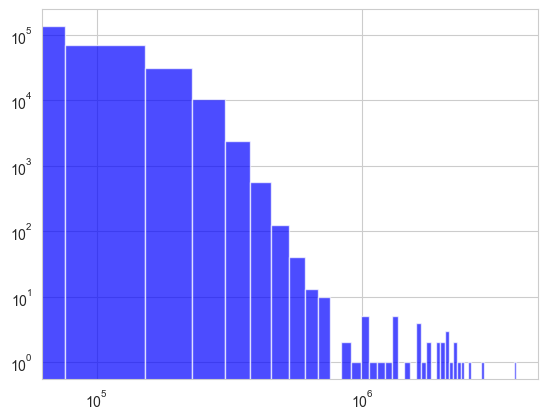

In [64]:
plt.hist(df['mileage_in_km'],bins=50,color='blue',alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [65]:
df.tail()

,brand,model,color,year,car_age,price_in_euro,power_kw,power_ps,power price ratio,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
251074,volvo,Volvo XC40,white,2023,1,57990,192.0,261.0,0.003311,Automatic,Hybrid,5.29941,43.0,1229.0
251075,volvo,Volvo XC90,white,2023,1,89690,173.0,235.0,0.001929,Automatic,Diesel,7.60000,202.0,4900.0
251076,volvo,Volvo V60,white,2023,1,61521,145.0,197.0,0.002357,Automatic,Diesel,4.70000,125.0,1531.0
251077,volvo,Volvo XC40,white,2023,1,57890,132.0,179.0,0.002280,Automatic,Hybrid,5.29941,45.0,1500.0
251078,volvo,Volvo XC40,gold,2023,1,52900,160.0,218.0,0.003025,Automatic,Electric,0.00000,0.0,50.0


In [66]:
df[df['price_in_euro']>2000000]

,brand,model,color,year,car_age,price_in_euro,power_kw,power_ps,power price ratio,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
1509,aston-martin,Aston Martin,brown,2011,13,2289000,559.0,760.0,0.000244,Automatic,Petrol,12.534545,286.682464,8900.0
93699,lamborghini,Lamborghini,grey,2018,6,5890500,566.0,770.0,0.000096,Automatic,Petrol,13.900000,326.000000,65.0
93840,lamborghini,Lamborghini,black,2021,3,3250000,602.0,818.0,0.000185,Automatic,Hybrid,14.800000,373.000000,177.0
106583,mercedes-benz,Mercedes-Benz SLR,grey,2007,17,2490000,478.0,650.0,0.000192,Automatic,Petrol,14.500000,348.000000,15793.0


In [67]:
df.columns

Index(['brand', 'model', 'color', 'year', 'car_age', 'price_in_euro',
       'power_kw', 'power_ps', 'power price ratio', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km'],
      dtype='object')

In [68]:
#df = pd.get_dummies(df, columns=['color'], prefix=['color'])
#df.head()

## Preprocessing stage

#### Encoding 

In [69]:
scaler = StandardScaler()
df[['power_kw', 'power_ps', 'fuel_consumption_l_100km', 'mileage_in_km']] = scaler.fit_transform(df[['power_kw', 'power_ps', 'fuel_consumption_l_100km', 'mileage_in_km']])

In [70]:
df['fuel_type']=df['fuel_type'].replace(['Unknown','Other'],'Other')
df['transmission_type'] = LabelEncoder().fit_transform(df['transmission_type'])
df['fuel_type'] = LabelEncoder().fit_transform(df['fuel_type'])
df['brand'] = LabelEncoder().fit_transform(df['brand'])
df['model'] = LabelEncoder().fit_transform(df['model'])
df['color'] = df['color'].astype('category')
df['color']=df['color'].cat.codes
df.head()

,brand,model,color,year,car_age,price_in_euro,power_kw,power_ps,power price ratio,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,0,14,9,1995,29,1300,0.302221,0.299195,0.113846,1,9,2.448925,260.000000,0.954583
1,0,7,1,1995,29,24900,0.899137,0.901756,0.007671,1,9,0.509069,162.294702,1.329361
2,0,18,1,1995,29,5900,-0.225286,-0.221663,0.018644,2,9,0.509069,162.294702,0.554396
3,0,18,1,1995,29,4900,-0.225286,-0.221663,0.022449,1,9,1.762005,225.000000,1.323009
4,0,7,9,1996,28,17950,0.080113,0.074511,0.007354,1,9,0.633493,162.294702,0.136766


We can take into consideration of removing all highy correlated values with code below:




In [71]:
df.shape

(250879, 14)

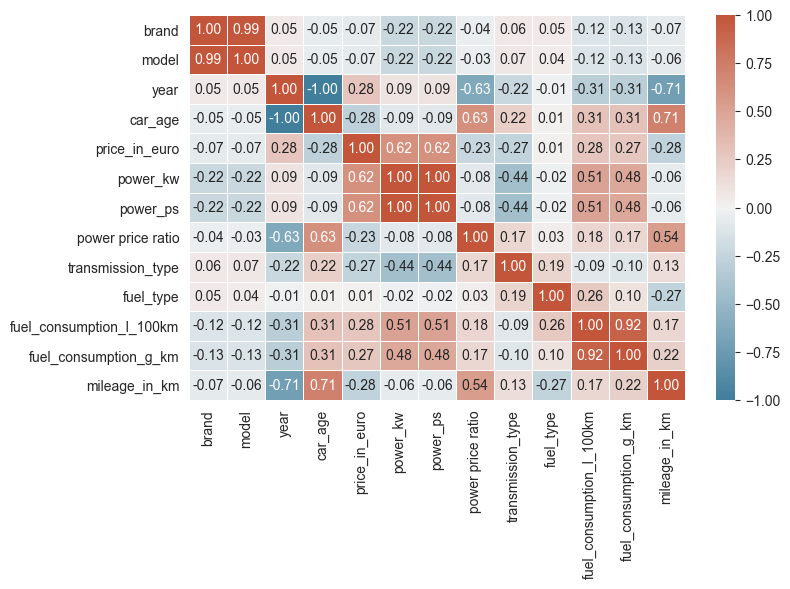

In [73]:
to_drop

In [75]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
cor = df[numerical_columns].corr()
plt.figure(figsize=(8,5))
#cor=df.corr()
sns.heatmap(cor,annot=True,cmap=cmap,fmt=".2f", linewidths=.5)
plt.show()

In [78]:
correlation_matrix = df.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.99)]
df = df.drop(to_drop, axis=1)
to_drop
df_encoded.shape

In [77]:
X=df.drop(labels=['price_in_euro'],axis=1)
y=df['price_in_euro']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

,brand,model,color,year,car_age,price_in_euro,power_kw,power price ratio,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,0,14,9,1995,29,1300,0.302221,0.113846,1,9,2.448925,260.000000,0.954583
1,0,7,1,1995,29,24900,0.899137,0.007671,1,9,0.509069,162.294702,1.329361
2,0,18,1,1995,29,5900,-0.225286,0.018644,2,9,0.509069,162.294702,0.554396
3,0,18,1,1995,29,4900,-0.225286,0.022449,1,9,1.762005,225.000000,1.323009
4,0,7,9,1996,28,17950,0.080113,0.007354,1,9,0.633493,162.294702,0.136766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,45,1300,12,2023,1,57990,0.913019,0.003311,0,5,-0.299044,43.000000,-1.068851
251075,45,1303,12,2023,1,89690,0.649266,0.001929,0,1,0.829756,202.000000,-1.022214
251076,45,1295,12,2023,1,61521,0.260576,0.002357,0,1,-0.593149,125.000000,-1.065015
251077,45,1300,12,2023,1,57890,0.080113,0.002280,0,5,-0.299044,45.000000,-1.065408
